In [1]:
# load in all the modules we're going to need
import nltk, re, string, collections
import pandas as pd
from nltk.util import ngrams # function for making ngrams

#Import seaborn for data exploration
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
sns.set(style="darkgrid")
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import wordpunct_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator  

import itertools

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c5250435\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_bjp=pd.read_csv('BJP_Clean_Tweets.csv')
df_congress=pd.read_csv('Congress_Clean_Tweets.csv')
df_bjp.head()

,Unnamed: 0,Created At,Likes,Location,Name,Retweet,Tweet,Tweet_cleaned,Tweet_translated,_id,id,party,hashtags
0,0,2019-03-28 09:38:37,NaN,banka,sudhanshu kumar das,NaN,RT @theskindoctor13: @ANI Shatrughan Sinha ke ...,ANI Shatrughan Sinha ke Congress me aane se ji...,RT @theskindoctor13: @ANI Shatrughan Sinha ke ...,5c9c96235c284c72c0f92f17,1111200911781564416,bjp,[]
1,1,2019-03-28 09:38:37,NaN,"Lucknow, India",Ayush Sfi,NaN,RT @YsakMv: CPI(M) Manifesto 2019 Release. M...,CPI M Manifesto 2019 Release Main Slogans Defe...,RT @YsakMv: CPI(M) Manifesto 2019 Release. M...,5c9c96245c284c72c0f92f18,1111200912255537152,bjp,[]
2,2,2019-03-28 09:38:37,NaN,"New Delhi, India",godi_media,NaN,RT @AisiTaisiDemo: Kuchh bhi mat bolo @abhisar...,Kuchh bhi mat bolo abhisar sharma Uss akhbaar ...,RT @AisiTaisiDemo: Kuchh bhi mat bolo @abhisar...,5c9c96255c284c72c0f92f19,1111200913014820864,bjp,[]
3,3,2019-03-28 09:38:38,NaN,अंतरिक्ष - स्वर्ग में😍,ॐ प्रियाशा चतुर्वेदी🇮🇳,NaN,RT @__kashyap__: #JayaPrada joins BJP. So BJP'...,#JayaPrada joins BJP So BJP s slogan is comple...,RT @__kashyap__: #JayaPrada joins BJP. So BJP'...,5c9c96265c284c72c0f92f1a,1111200915862614016,bjp,"['JayaPrada', 'BJPVijaySankalp', 'NamoAgain']"
4,4,2019-03-28 09:38:38,NaN,NaN,Chowkidar SAI,NaN,RT @rajnathsingh: Had a wonderful interaction ...,Had a wonderful interaction with BJP activists...,RT @rajnathsingh: Had a wonderful interaction ...,5c9c96275c284c72c0f92f1b,1111200916655341568,bjp,[]


In [32]:
df_congress.head()

,Unnamed: 0,Created At,Location,Name,Tweet,Tweet_cleaned,Tweet_translated,_id,id,party,hashtags
0,0,2019-03-28 09:36:57,"Maharashtra, India",चौकीदार - वंदना,RT @aajtak: संजय सिंह ने राहुल गांधी से पूछा स...,Sanjay Singh asked Rahul Gandhi questions,RT @aajtak: Sanjay Singh asked Rahul Gandhi qu...,5c9c95bf5c284c7a04966b96,1111200491860418561,congress,[]
1,1,2019-03-28 09:36:57,Hindustan,Vedzee97,"RT @ss_suryawanshi: .@INCMaharashtra alleged,....",INCMaharashtra charged one more Chaukidar in D...,"RT @ss_suryawanshi: @ INCMaharashtra charged, ...",5c9c95c05c284c7a04966b97,1111200492586262533,congress,[]
2,2,2019-03-28 09:36:57,NaN,Shalmon thombare चौकीदार चोर है..,RT @mataonline: काँग्रेसची 'न्याय' योजना क्रां...,Congress justice plan revolutionary Raghuram R...,NaN,5c9c95c15c284c7a04966b98,1111200492644790272,congress,['RaguramRajan']
3,3,2019-03-28 09:36:57,"Vellore, Tamil Nadu, India",chowkidar esan a venkat,@somitmakar @NationJai @JhaSanjay @RahulGandhi...,somitmakar NationJai JhaSanjay RahulGandhi Sha...,NaN,5c9c95c25c284c7a04966b99,1111200493106126848,congress,[]
4,4,2019-03-28 09:36:58,DIASPORA,AYOTUNDE,RT @SaharaReporters: while the incumbent gover...,while the incumbent governor Jibrilla Bindow o...,NaN,5c9c95c35c284c7a04966b9a,1111200496063340544,congress,['Ad']


In [3]:
#Changed to original since the emojis, punctuations might come handy
texts_b=df_bjp['Tweet_cleaned']
texts_c=df_congress['Tweet_cleaned']
texts_c[800:805].values

array(['To all Muslimah happy #MuslimWomenDay In honor of the 2nd anniversary of #MuslimWomenDay I celebrate trailblazers Tlaib amp',
       'AmitShah SwamiGeetika BJP4India BJP4Assam Congress is playing dangerous politics in Tripura by provoking indigenous peoples against local Bengali people This should be addressed properly sir for peace and prosperity of this region AmitShah narendramodi BjpBiplab',
       'We have to VET every single candidate and person of position FOREVER We may never be rid of this regime',
       'BJP4India gssjodhpur 50 60 saal congress ko diye Lagbhag lagatar Ab bjp ko bhi seva ka moka milna cahiye na 50 60 sall',
       'In 1977 when a coalition of right wing parties accused Pakistan s then PM Zulfiqar Bhutto of being a drunk his response was Haan mein #sharaab peeta hoon lekin awam ka khoon nahi peeta Yes I drink but I do not drink the people s blood'],
      dtype=object)

### Here, we are removing some of the famous tweet handlers to get a unbiased data while fetching ngrams

#### Please keep in mind, these handlers were dominating the ngram top chart, and hence we are going to remove them

In [79]:
#Handling stopwords
stopwrd = set(stopwords.words('english'))
#stopwrd.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','bjp','priyankac19','bjp','congress','jhasanjay']) # remove it if you need punctuation 
stopwrd.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','bhi','ji','ki','ashutosh83b','divyaspandana','congress','incindia','bjp4india','priyankac19','priyankagandhi','#','amitshah','jhasanjay','asuthosh83b','rssurjewala','bjp','myogiadityanath'])
#,'incindia','rahulgandhi','bjp4india','priyankac19','priyankagandhi','narendramodi','#','amitshah','jhasanjay','asuthosh83b','rssurjewala','myogiadityanath']) 
texts_bjp=[]
for sentence in texts_b:
    texts_bjp.append([i for i in sentence.lower().split() if i not in stopwrd])
texts_congress=[]
for sentence in texts_c:
    texts_congress.append([i for i in sentence.lower().split() if i not in stopwrd])
texts_bjp[975:977]

[['self', 'goal', 'mla', 'ctravi'],
 ['pm',
  'modi',
  'slams',
  'sp',
  'bsp',
  'alliance',
  'says',
  '2019',
  'polls',
  'honesty',
  'vs',
  'dynasty',
  '#loksabhaelection2019',
  '#bjp']]

In [80]:
texts_wo_stpwrds_bjp=pd.Series(texts_bjp).apply(lambda x:' '.join(x))
#texts_wo_stpwrds_bjp
texts_wo_stpwrds_congress=pd.Series(texts_congress).apply(lambda x:' '.join(x))
texts_wo_stpwrds_congress[119:124]

119    india envisioned mahatma gandhi pandit jawahar...
120    arunjaitley 20 30 yrs enough develop nation lo...
121    tax raids karnataka corrupt engineers contract...
122    right bipartisan bill senate would require ful...
123    unacceptable shameful counterproductive media ...
dtype: object

In [81]:
texts_wo_stpwrds_bjp[555:560]

555    1 hatao garibi apne aap hat jaayegi narendra m...
556       made right choice candidate vile votes attract
557    rajatsharmalive narendramodi mayawati yadavakh...
558               #jai bjp#jai kanna lakshmi narayana#29
559    urge people give befitting reply terrorists pa...
dtype: object

In [82]:
texts_wo_stpwrds_bjp[2019:2022].values

array(['supriyobabul bjp4bengal aitcofficial un remember one powerful leader bengal blocked',
       'india might survive another five years modi fine piece ashoswai',
       'hello #itraid political rights day modi conduct raids corrupt yeddi sons nexus'],
      dtype=object)

# Wordcloud generation 

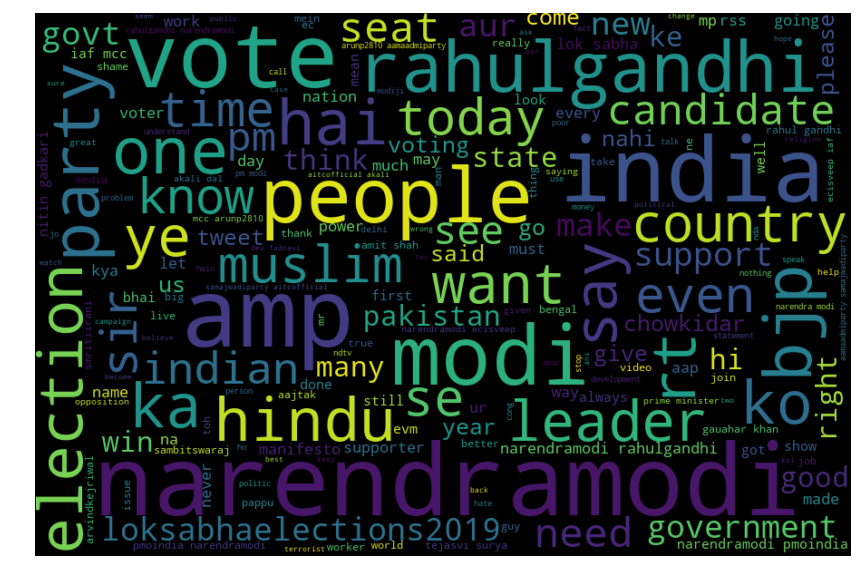

In [83]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

all_words_BJP = ' '.join([text for text in texts_wo_stpwrds_bjp])

wordcloud = WordCloud(width=900, height=600, random_state=2, max_font_size=110).generate(all_words_BJP)

plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

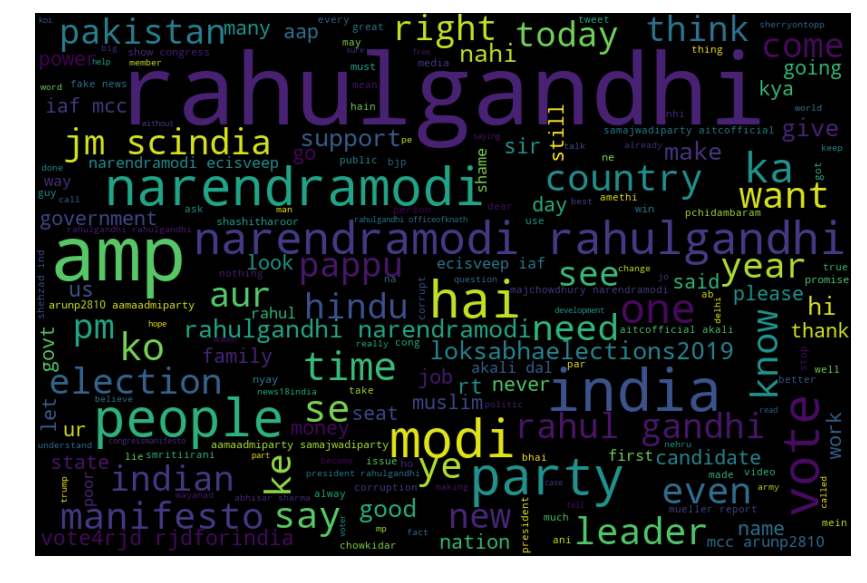

In [84]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

all_words_congess = ' '.join([text for text in texts_wo_stpwrds_congress])

wordcloud2 = WordCloud(width=900, height=600, random_state=2, max_font_size=110).generate(all_words_congess)

plt.figure(figsize=(18, 10))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.show()

In [101]:
df_bjp_tweets=pd.DataFrame(texts_wo_stpwrds_bjp)
df_all_tweets=pd.concat([df_bjp_tweets,pd.Series(texts_wo_stpwrds_congress)],axis=0,ignore_index=True)
df_all_tweets.columns=['Tweet']
df_all_tweets.tail()

,Tweet
74237,rahulgandhi pm 15
74238,fake party veterans denied letter proved fake ...
74239,mmazumdar2014 cnnnews18 smritiirani gandhi led...
74240,reknahs yadhum15 malhijs rbphadke majchowdhury...
74241,low iq bhakts support neither robertvadra amp ...


In [125]:
def get_party_score(tweet,mode='compound'):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(tweet)
    #print(score)
    return str(score[mode])

In [126]:
get_party_score('hello #itraid political rights day modi conduct raids bad corrupt yeddi sons nexus')

'-0.5423'

In [127]:
df_all_tweets['score_compound']=df_all_tweets['Tweet'].apply(get_party_score)
df_all_tweets.tail()

,Tweet,score_compound
74237,rahulgandhi pm 15,0.0
74238,fake party veterans denied letter proved fake ...,-0.5719
74239,mmazumdar2014 cnnnews18 smritiirani gandhi led...,0.0
74240,reknahs yadhum15 malhijs rbphadke majchowdhury...,0.1779
74241,low iq bhakts support neither robertvadra amp ...,-0.4592


# Congress's negative tweets are BJP's positive and vice versa.. in general, a negative compound score means dissatisfaction with the present government

In [8]:
def sentiment_analyzer_scores(sentence):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(score)))
    return score

In [20]:
bjp_score=pd.Series(get_party_score(texts_wo_stpwrds_bjp))
congress_score=pd.Series(get_party_score(texts_wo_stpwrds_congress))

[0.7823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2732, 0.3523, 0.0, -0.5719, 0.0, 0.4215, 0.0]
[0.7823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2732, 0.3523, 0.0, -0.5719, 0.0, 0.4215, 0.0]


In [27]:
texts=texts_wo_stpwrds_bjp.append(texts_wo_stpwrds_congress)
labels=bjp_score.append(congress_score)
print('Some texts are :\n {}'.format(texts[419:424].values))
print('Some labels are :\n {}'.format(labels[419:424].values))

Some texts are :
 ["@salimdotcomrade: bjp's giriraj singh sulking underdog @kanhaiyakumar’s campaign full swing. bjp scrambling b…"
 '@dav93civil: basic needs man: food, water &amp; shelter. bjp political needs: hindu, pakistan &amp; nehru. #nomorebjp'
 '5-6 max bjp coastal belt mostly hindutva deluded people number'
 '@ravendra11singh: बैंको को मजबूती देती मोदी सरकार @narendramodi @amitshah @myogiadityanath #bjp #voteforbjp2019 https://t.co/xjcbt37fxe'
 '@aitcofficial: strongly condemn arrest #right2food expert #jeandreze jharkhand. #bjp desperate know expiry dat…']
Some labels are :
 [-0.3612  0.      0.0772  0.     -0.6369]
